In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def load_datasets(filename, column_list, target_column):
    
    
   
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y

In [17]:
def split_datasets(X, y, test_size = 0.2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [18]:
def plot_data(X_train, X_test, y_train, y_test):
   

    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [19]:
def normalize(X):
    
    ##################
    # Заповнити змінні
    ##################
    #mean = None
    mean= np.mean(X)
    #std = None
    std=np.std(X)
    #X_new = None
    X_new=(X-mean)/std
    return X_new, mean, std

In [20]:
def prepare_X(X):
    
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [21]:
def hypothesis(X, theta):
    
    h_thetha=np.dot(X,theta)
    return h_thetha

In [22]:
def cost_function(X, y, theta):
    
    m = X.shape[0]
    if m == 0:
        return None
    
    
    J = (1/(2*m))*np.sum((hypothesis(X, theta) - y)**2)
    return J

In [23]:
def derivative(X, y, theta):
    m = X.shape[0]
 похідних d_thetha

   
    d_thetha=(1/m)*(np.dot(hypothesis(X,theta)-y,X))
    
    return d_thetha

In [24]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        delta=alpha*derivative(X,y,theta)
        theta = theta - delta
        #J = None
        J=cost_function(X, y, theta)
        
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history


In [25]:
def plot_J(X, y):

    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

In [26]:
X, y = load_datasets('burrito.csv', ["population"], "profit")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97, 1), y=(97,)


In [27]:
test_size = 0.2 #0.0
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77, 1), y=(77,)
Test set: X=(20, 1), y=(20,)


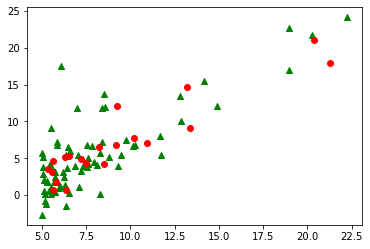

In [28]:
plot_data(X_train, X_test, y_train, y_test)

In [29]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

In [30]:
y = y_train[:]

In [31]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
30.208694050531818


In [32]:
alpha = 0.01
num_iters = 1500

In [33]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 5.519306356493395; Theta 1: 4.456137688351132


C:\Users\Ira\AppData\Local\Temp/ipykernel_4252/2757528781.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


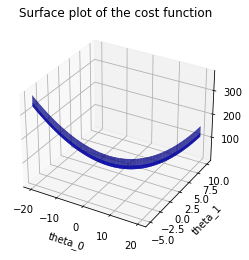

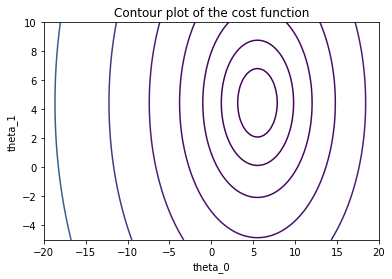

In [34]:
plot_J(X, y)

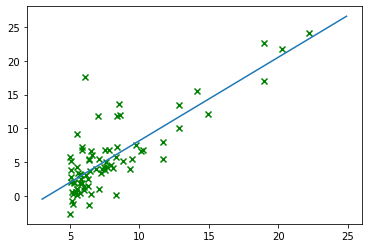

In [35]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean)/std

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

In [36]:
X_test_proc = prepare_X(X_test)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
print('X_Test:{}'.format(X_test.shape))
print('Y_test:{}'.format(y_test.shape))
print('y_pred:{}'.format(y_test_pred.shape))
print('err:{}'.format(rel_diff.shape))

res = pd.DataFrame({'X' : X_test.squeeze(), 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

X_Test:(20, 1)
Y_test:(20,)
y_pred:(20,)
err:(20,)
          X  y_actual      y_pred          err
0    5.8014   1.84400   31.371144  1601.255073
1   10.2360   7.77540   51.132332   557.616737
2    5.5649   3.08250   30.317267   883.528531
3    9.2482  12.13400   46.730559   285.120809
4    5.3794   3.51290   29.490653   739.495956
5   10.9570   7.04670   54.345207   671.214994
6    9.1802   6.79810   46.427542   582.948788
7    6.3557   0.67861   33.841181  4886.837898
8   13.1760  14.69200   64.233377   337.199677
9    7.4764   4.34830   38.835174   793.111657
10   6.5159   5.34360   34.555054   546.662436
11  21.2790  17.92900  100.341460   459.660105
12   8.5172   4.24150   43.473122   924.946888
13   6.3261   5.18750   33.709279   549.817426
14   7.2182   4.88520   37.684599   671.403411
15  13.3940   9.05510   65.204815   620.089392
16   5.6397   4.60420   30.650586   565.709267
17   8.2111   6.54260   42.109099   543.614137
18  20.3410  20.99200   96.161603   358.086905
19   5.64